<a href="https://colab.research.google.com/github/RoTorresT/Covid-19/blob/master/Sinadef_Pais_Peru_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%reset
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates
from google.colab import files

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,3,13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

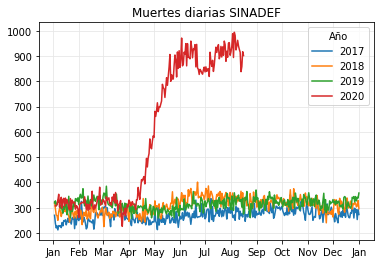

In [20]:
#Pais
#lee 
df=pd.read_csv('/content/drive/My Drive/COVID/fallecidos_sinadef.csv', delimiter=';',encoding='latin1') #cambiar fuente
df.columns = ['Num','TIPO SEGURO','SEXO','EDAD','TIEMPO EDAD','ESTADO CIVIL','NIVEL DE INSTRUCCIÓN','COD# UBIGEO DOMICILIO','PAIS DOMICILIO','DEPARTAMENTO DOMICILIO','PROVINCIA DOMICILIO','DISTRITO DOMICILIO','FECHA','AÑO','MES','TIPO LUGAR','INSTITUCION','MUERTE VIOLENTA','NECROPSIA','DEBIDO A (CAUSA A)','CAUSA A (CIE-X)','DEBIDO A (CAUSA B)','CAUSA B (CIE-X)','DEBIDO A (CAUSA C)','CAUSA C (CIE-X)','DEBIDO A (CAUSA D)','CAUSA D (CIE-X)','DEBIDO A (CAUSA E)','CAUSA E (CIE-X)','DEBIDO A (CAUSA F)','CAUSA F (CIE-X)','ASS','ASS','ASS','ASS']
df=df.drop(columns="ASS")
df=df.drop(index=[0, 1])

#solo fechas
df_Fecha = pd.DataFrame(df["FECHA"].str.split(';', expand=True).stack(), columns=["FECHA"])
df_Fecha_Contadas=df_Fecha.groupby(["FECHA"])["FECHA"].count()

df_Fecha_Contadas.to_numpy()

muertes_2017=df_Fecha_Contadas[0:365]
muertes_2018=df_Fecha_Contadas[365:730]
muertes_2019=df_Fecha_Contadas[731:1096]
muertes_2020=df_Fecha_Contadas[1096:]

cantidad_dias_ano_2020=len(muertes_2020)

#grafico

numdays = 365

#Error dia, debe ser automatico
base = datetime.datetime(2017,1,1)
date_list = [base - datetime.timedelta(days=x) for x in range(0, numdays)]
#date_list_2020=date_list[0:len(a2020)]

# Set the locator
locator = mdates.MonthLocator()  # every month

# Specify the format - %b gives us Jan, Feb...
fmt = mdates.DateFormatter('%b')

a2017_temporal=muertes_2017[::-1]
a2018_temporal=muertes_2018[::-1]
a2019_temporal=muertes_2019[::-1]
a2020_temporal=muertes_2020[::-1]

#Reshape del vector para quitar el ultimo valor. Siempre el dato del sinadef esta mal.
numero_dias_ignorados=int(1) #Si es 1 ignora el ultimo dia, si 2, ignora los dos ultimos.
a2020_temporal=a2020_temporal[numero_dias_ignorados:len(a2020_temporal)]


#Ajuste para cantidad de elementos de 2020. Cambiar en 2021
a=int(365-len(muertes_2020))
date_list_2020 = [base - datetime.timedelta(days=x) for x in range(a+0, -numero_dias_ignorados+a+len(muertes_2020))]

plt.plot(date_list,     a2017_temporal,label='2017')
plt.plot(date_list,     a2018_temporal,label='2018')
plt.plot(date_list,     a2019_temporal,label='2019')
plt.plot(date_list_2020,a2020_temporal,label='2020')
X = plt.gca().xaxis
X.set_major_locator(locator)

# Specify formatter
X.set_major_formatter(fmt)

plt.grid(axis='both', color='0.9')
plt.legend(title='Año')
plt.title('Muertes diarias SINADEF')

plt.savefig("Sinadef_SinFiltro_Peru.png")
files.download("Sinadef_SinFiltro_Peru.png")

plt.show()